In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import copy
'''
Signal is the parent class and will hold information
like amplitude, frequency, offset.
It also allows the user to directly input xs and ys 
values through the set_xs(), set_ys()
'''
class Signal:
    def __init__(self, freq=440.0, amp=1.0, offset=0.0):
        self.freq = freq
        self.amp = amp
        self.offset = offset
        self.xs = np.asarray([])
        self.ys = np.asarray([])

    def set_xs(self, xs=[]):
        self.xs = xs
    def set_ys(self, ys=[]):
        self.ys = ys

    def _dt(self):
        return 1/(5*2*np.pi*self.freq)

    def __add__(self,other):
        if(self.xs[-1] >= other.xs[-1]):
            new_signal = copy.copy(other)
            new_signal.xs = self.xs
            new_signal.set_ys()
            new_signal.ys = self.ys + new_signal.ys
        else:
            new_signal = copy.copy(self)
            new_signal.xs = other.xs
            new_signal.set_ys()
            new_signal.ys = self.ys + new_signal.ys
        return new_signal

    def plot(self):
        plt.plot(self.xs,self.ys)

'''
CosSignal and SinSignal will be used to do the actual construction
of sine and cosine waves.
'''
class CosSignal(Signal):
    def __init__(self, freq=440.0, amp=1.0, offset=0.0):
        super().__init__(freq=freq, amp=amp,offset=offset)
        self.set_xs()
        self.set_ys()

    def set_xs(self):
        period = 1/self.freq
        self.xs = np.linspace(0,3*period, 101)

    def set_ys(self):
        self.ys = self.offset + self.amp*np.cos(2*np.pi*self.freq*self.xs)

    def get_freq(self):
        return self.freq
    def get_amp(self):
        return self.amp
    def get_offset(self):
        return self.offset

class SinSignal(Signal):
    def __init__(self, freq=440.0, amp=1.0, offset=0.0):
        super().__init__(freq=freq, amp=amp,offset=offset)
        self.set_xs()
        self.set_ys()

    def set_xs(self):
        period = 1/self.freq
        self.xs = np.linspace(0,3*period, 101)

    def set_ys(self):
        self.ys = self.offset + self.amp*np.sin(2*np.pi*self.freq*self.xs)

    def get_freq(self):
        return self.freq
    def get_amp(self):
        return self.amp
    def get_offset(self):
        return self.offset

cos_signal_1 = CosSignal(freq=440.0)
sin_signal_2 = SinSignal(freq=880.0, amp=0.5)
sum_wave = cos_signal_1 + sin_signal_2

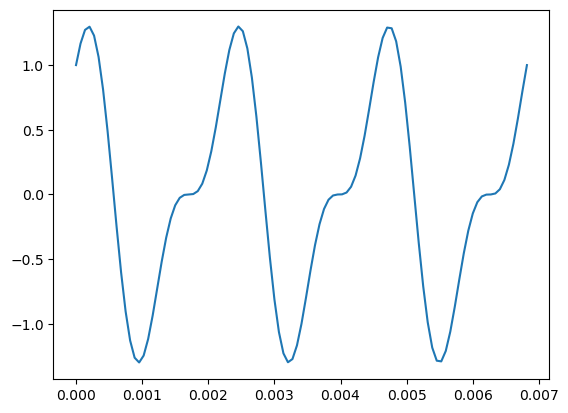

In [3]:
sum_wave.plot()

### Working with .wav files

In [4]:
import wave

In [5]:
violin_wave = wave.open("code_92002__jcveliz__violin-origional.wav")

**getframerate()** tells us how many samples of the sound are taken every second

In [6]:
sample_freq = violin_wave.getframerate()
print(sample_freq)

44100


**getnframes()** gives number of samples in the audio file

In [7]:
n_samples = violin_wave.getnframes()
print(n_samples)

220500


Length of sample

In [8]:
t_audio = violin_wave.getnframes()/violin_wave.getframerate()
print(t_audio)

5.0


Stereo will have 2 channels while mono will have one

In [9]:
n_channels = violin_wave.getnchannels()
print(n_channels)

1


In [10]:
signal_wave = violin_wave.readframes(violin_wave.getnframes())
type(signal_wave)

bytes

In [11]:
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
signal_array.shape

(220500,)

If the channels is stereo signal_array will have to be split into left and right channels. **frombuffer()** creates a one dimensional array. To get the two channels we'll have to split this 1-D array into 2 one D-arrays down the middle. The first array will be the left channel and the second the right channel

In [12]:
times = np.linspace(0, t_audio, num=n_samples)

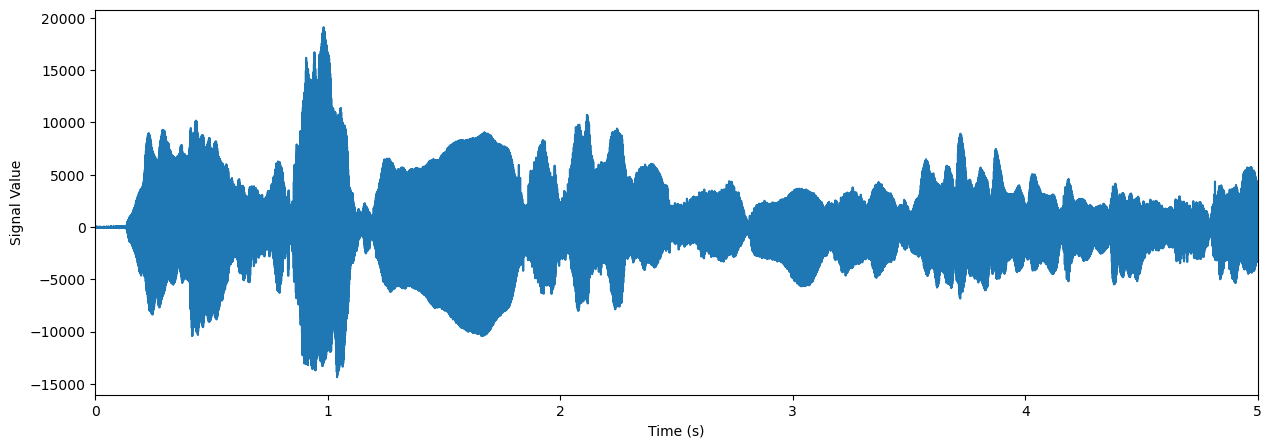

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(times, signal_array)
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

Show the first 1000 sample points

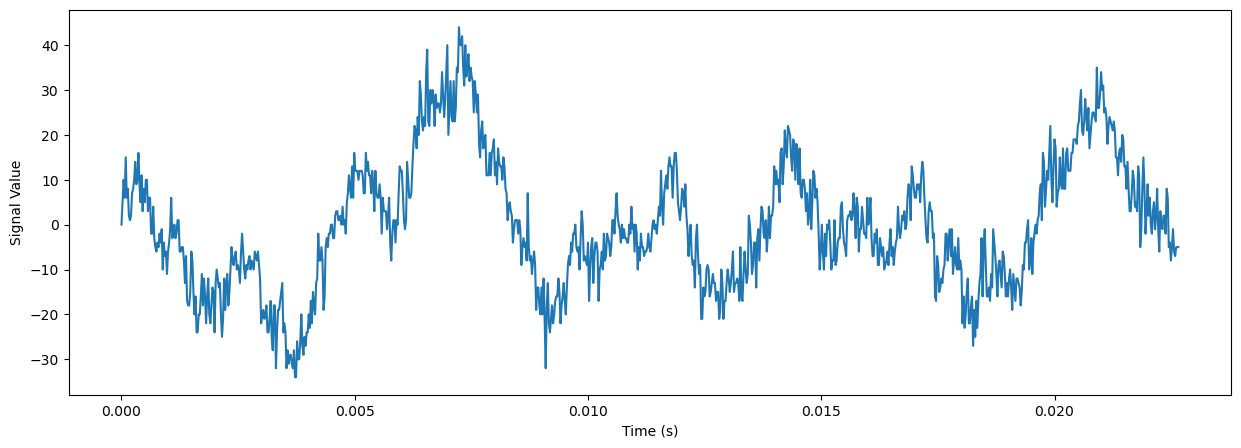

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(times[0:1000], signal_array[0:1000])
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.show()

pyplot's **specgram()** creates a Spectogram. A Spectogram uses FFT to show the frequencies and how much they occur in specific chunks of time. 

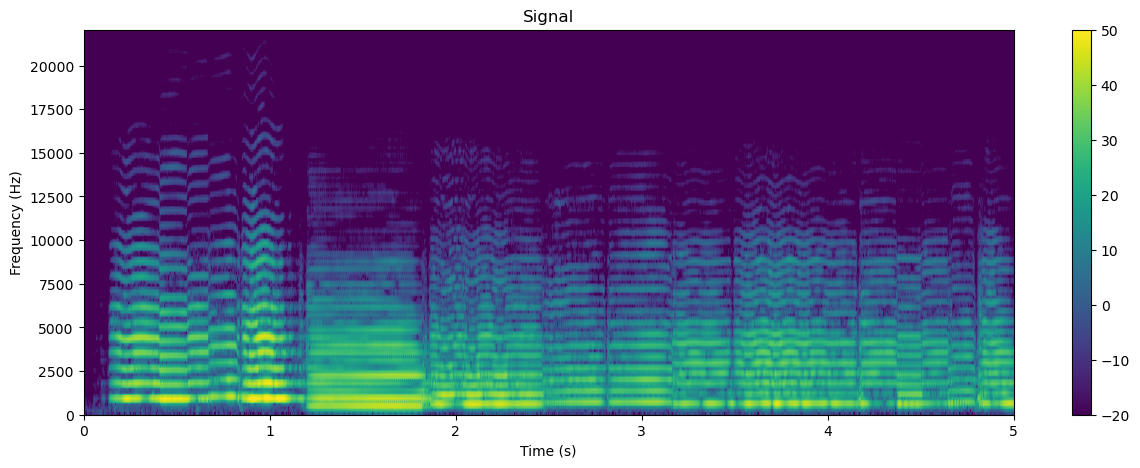

In [15]:
plt.figure(figsize=(15, 5))
plt.specgram(signal_array, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()

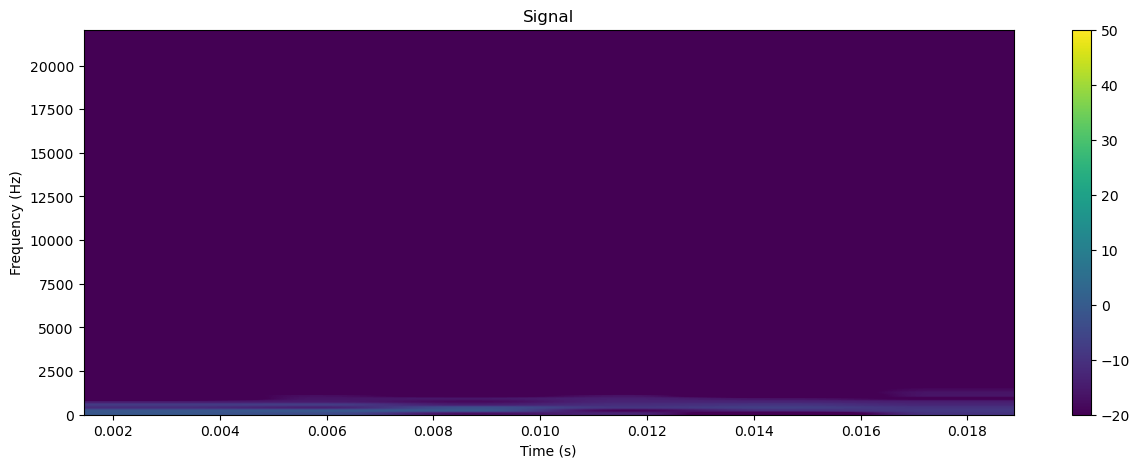

In [16]:
plt.figure(figsize=(15, 5))
plt.specgram(signal_array[0:1000], Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Signal')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.colorbar()
plt.show()

In [17]:
signal_array[0:10], signal_array.shape

(array([ 0,  5, 10,  6, 15,  6,  8,  2,  1,  2], dtype=int16), (220500,))

In [18]:
violin_wave.close()

In [19]:
signal_array.max(), signal_array.min()

(19109, -14353)

The **getsampwdith()** tells how many bytes are used to sample the wave form. This value can normally only be 1 byte, 2 bytes or 3 bytes. It gives the resolution of the signal. A 1 byte sample width can represent 256 values (not to be confused with representing -128,127; 2 bytes represents 65536 values while 3 bytes represents 16777216. In reality 2 bytes is sufficient, while 1 byte would be poor quality audio and 3 bytes would be extremely high quality that would not be useful to the lay person.

See the following further details:
https://audioaudit.io/articles/podcast/sample-width

In [20]:
violin_wave.getsampwidth()

2

In [21]:
sample_freq, signal_array.shape

(44100, (220500,))

### The Fast Fourier Transform
\begin{equation}
x
\end{equation}

In [26]:
from scipy import fftpack

In [27]:
'''
get_fft() returns the amplitude and frequency value for a sample of the wav sound file.
hs = np.fft.rfft(sample) - 

'''
def get_fft(signal_array, sample_freq, start_cutoff=0.0, sample_length=1.0):
    sample = signal_array
    ts = np.arange(len(signal_array)) / sample_freq
    end = ts[-1]
    start = ts[0]
    n = len(sample)
    i = round((n-1)*(start_cutoff - start) / (end - start))
    j = round((n-1)*(start_cutoff + sample_length - start) / (end - start))
    sample = sample[i:j]
    hs = fftpack.rfft(sample)
    fs = fftpack.rfftfreq(len(sample), 1/sample_freq)
    amps = np.absolute(hs)

    return fs, amps

In [28]:
fs, amps = get_fft(signal_array, sample_freq, start_cutoff=1.2, sample_length=0.6)

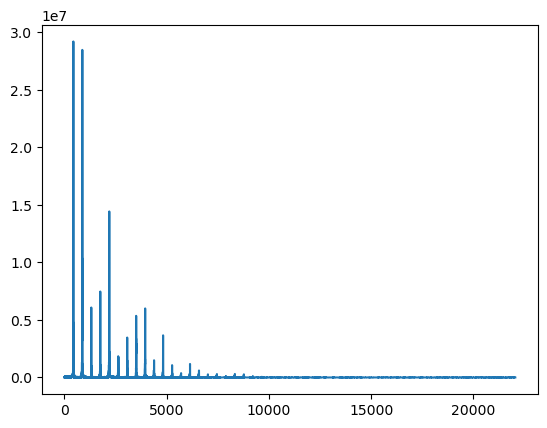

In [29]:
plt.plot(fs, amps)

In [30]:
amps.max(), amps.min()

(29177789.308165863, 0.05978398798947637)

**Discrete Fourier Transform naive implementation**
\begin{equation}
F[X_n] = \sum_{n=0}^{N-1} x[n] e^{-2\pi j\frac{kn}{N}}
\end{equation}

In [32]:
def naive_dft(x_array):
    x = x_array
    fft_sum = []
    N = len(x)
    for n in range(0,len(x)):
        temp_value = 0
        for i in range(0,len(x)):
            temp_value += x[i]*np.power(np.e,-2*np.pi*1.j*(i*n/N))
        fft_sum.append(temp_value)
    return fft_sum

def naive_freq(length_x):
    n = length_x
    freq = np.linspace(0,1,n)
    return freq

### Discrete Inverse Fourier Transform

\begin{equation}
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X_ke^{j2\pi k \frac{n}{N}}
\end{equation}

In [33]:
def naive_idft(X_array):
    X = X_array
    ifft_sum = []
    N = len(X)
    for n in range(0, N):
        temp_value = 0
        for i in range(0,N):
            temp_value += X[i]*np.power(np.e,2*np.pi*1.j*(i*n/N))
        temp_value = temp_value/N
        ifft_sum.append(temp_value)
    return ifft_sum

### Using scipy fftpack

120


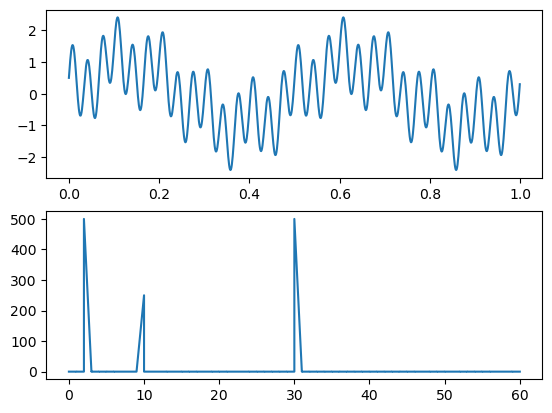

In [34]:
A1 = 1
A2 = 0.5
A3 = 1
w1 = 2 #Hz
w2 = 10 #Hz
w3 = 30 #Hz
'''
To get the correct sampling rate we usually use 2*max(w1,w2,...,wn). However, because the
fftpack.rfftfreq() is between (-0.5,0.5) we would miss out some of the values
'''
f_s = 4*max(w1,w2,w3) # Number of measurements per second (sampling rate). 
if f_s < 500:
    f_s = 1000

t = np.linspace(0,1,f_s, endpoint=False)
x = A1 * np.sin(2 * np.pi * w1 * t) + A2 * np.cos(2 * np.pi * w2 * t) + A3 * np.sin(2 * np.pi * w3 * t)

X = fftpack.rfft(x)
X = np.abs(X)
freqs = fftpack.rfftfreq(len(x))*f_s
X = X[0:4*max(w1,w2,w3)]
freqs = freqs[0:4*max(w1,w2,w3)]
print(len(X))
plt.subplot(2, 1, 1)
plt.plot(t,x)
plt.subplot(2,1,2)
plt.plot(freqs, X)

### Testing Naive DFT and IDFT to ensure that the code is correct

1000 1000


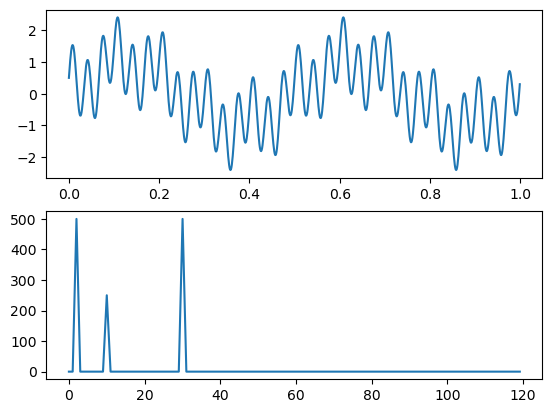

In [35]:
A1 = 1
A2 = 0.5
A3 = 1
w1 = 2 #Hz
w2 = 10 #Hz
w3 = 30 #Hz
'''
To get the correct sampling rate we usually use 2*max(w1,w2,...,wn). However, because the
fftpack.rfftfreq() is between (-0.5,0.5) we would miss out some of the values
'''
f_s = 4*max(w1,w2,w3) # Number of measurements per second (sampling rate). 
if f_s < 500:
    f_s = 1000

t = np.linspace(0,1,f_s, endpoint=False)
x = A1 * np.sin(2 * np.pi * w1 * t) + A2 * np.cos(2 * np.pi * w2 * t) + A3 * np.sin(2 * np.pi * w3 * t)
X = naive_dft(x)
X_1 = np.abs(X)
freqs = naive_freq(len(x))*f_s
print(len(X_1), len(freqs))
X_1 = X_1[0:4*max(w1,w2,w3)]
freqs = freqs[0:4*max(w1,w2,w3)]
plt.subplot(2, 1, 1)
plt.plot(t,x)
plt.subplot(2,1,2)
plt.plot(freqs, X_1)

In [36]:
x = []
x = naive_idft(X)

In [37]:
t = np.linspace(0,1,len(x))

C:\Users\alexe\anaconda3\envs\DSP\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


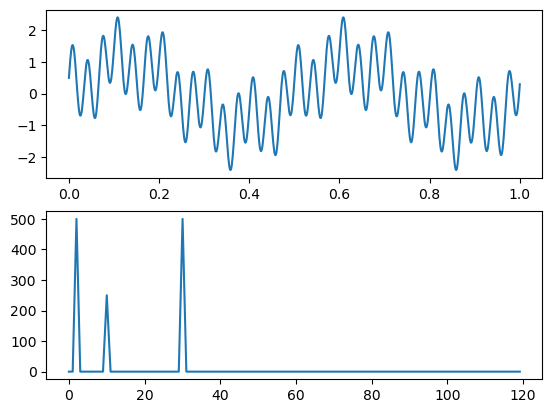

In [38]:
plt.subplot(2, 1, 1)
plt.plot(t,x)
plt.subplot(2,1,2)
plt.plot(freqs, X_1)

## 1.8 Exercises

### Exercise 1.2 

Go to http://freesound.org and download a sound sample
that includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is constant. Compute
and plot the spectrum of the segment you selected. What connection can
you make between the timbre of the sound and the harmonic structure you
see in the spectrum?

In [97]:
trumpet_wave = wave.open("code_170255__dublie__trumpet.wav")

In [98]:
n_frequency = trumpet_wave.getframerate()
print(n_frequency)

44100


In [200]:
sample_width = trumpet_wave.getsampwidth()
print(sample_width)

2


In [99]:
n_samples = trumpet_wave.getnframes()
print(n_samples)

385123


In [100]:
t_audio = n_samples/n_frequency
print(t_audio)

8.732947845804988


In [101]:
n_channels = trumpet_wave.getnchannels()
print(n_channels)

2


In [102]:
signal_wave = trumpet_wave.readframes(trumpet_wave.getnframes())
type(signal_wave)

bytes

In [103]:
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
signal_array.shape

(770246,)

In [121]:
first_channel = signal_array[::2]
len(first_channel)

385123

In [122]:
times = np.linspace(0, t_audio, num=n_samples)

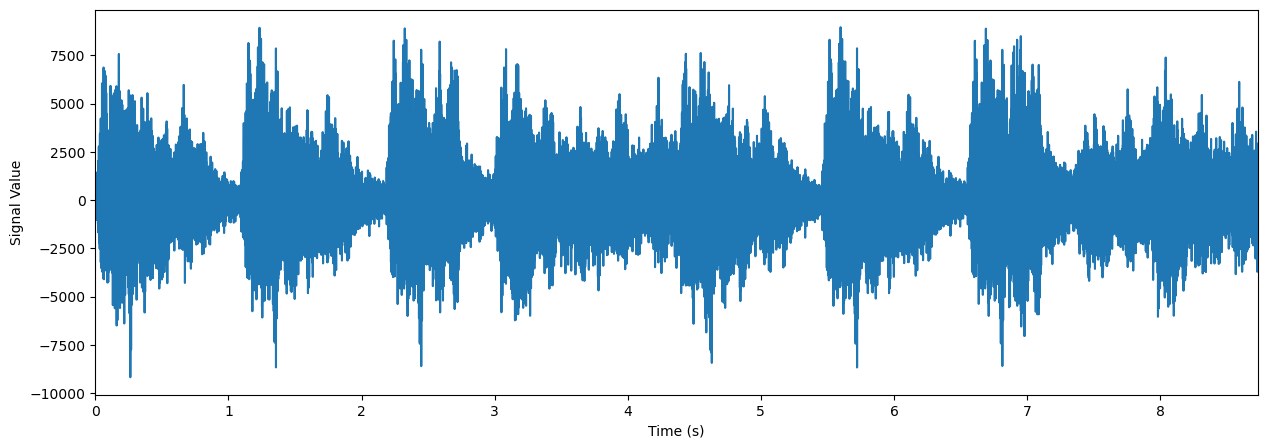

In [123]:
plt.figure(figsize=(15, 5))
plt.plot(times, first_channel)
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

In [124]:
trumpet_wave.close()

In [125]:
def get_segment(signal_array, sampling_frequency, start=0.0, duration=1.0):
    signal = signal_array
    n_freq = sampling_frequency
    start = start
    duration = duration
    '''
    convert duration and start to array indices
    '''
    start_index = round(start*n_freq)
    duration_count = round(duration*n_freq)
    end_index = start_index+duration_count
    
    segment = signal_array[start_index:end_index]
    return segment

In [177]:
segment = get_segment(first_channel,n_frequency, start=1.1, duration=0.3)

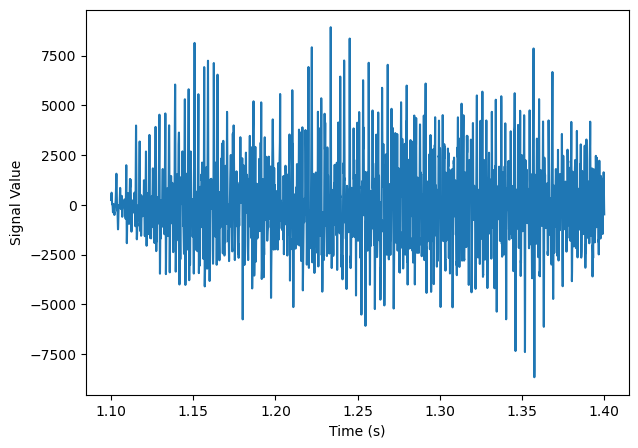

13230


In [179]:
t = np.linspace(1.1,1.4,len(segment))
plt.figure(figsize=(7, 5))
plt.plot(t,segment)
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.show()
print(len(segment))

In [172]:
def high_pass_filter(signal, sampling_frequency, high=700):
    x = signal
    f_s = sampling_frequency
    X = fftpack.rfft(x)
    X = np.abs(X)
    freqs = fftpack.rfftfreq(len(x))*f_s
    n = len(X)
    start = freqs[0]
    end = freqs[-1]
    i = round((n-1)*(high-start)/(end-start))
    return X[:i], freqs[:i]

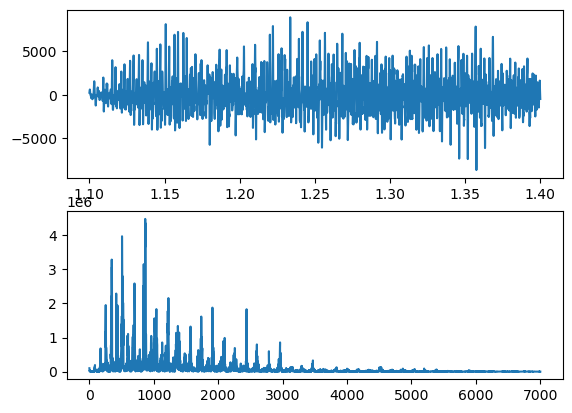

In [182]:
segment = get_segment(first_channel,n_frequency, start=1.1, duration=0.3)
X_1, freqs = high_pass_filter(segment, n_frequency, high=7000)
plt.subplot(2, 1, 1)
plt.plot(t,segment)
plt.subplot(2,1,2)
plt.plot(freqs, X_1)

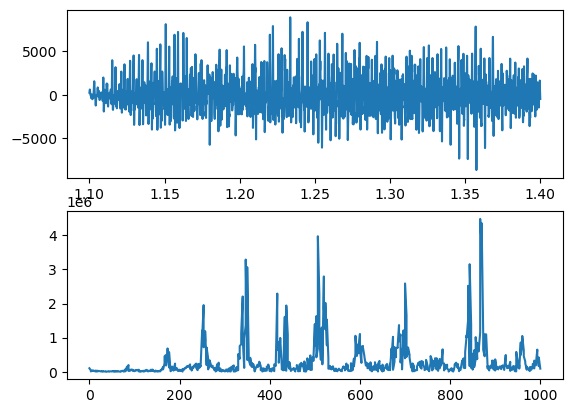

In [184]:
segment = get_segment(first_channel,n_frequency, start=1.1, duration=0.3)
X_1, freqs = high_pass_filter(segment, n_frequency, high=1000)
plt.subplot(2, 1, 1)
plt.plot(t,segment)
plt.subplot(2,1,2)
plt.plot(freqs, X_1)

In [185]:
from scipy.io.wavfile import write as wav_write

In [186]:
wav_write("orginal trumpet.wav", n_frequency, signal_array)

Function to reconstruct wave from integer array

In [208]:
def to_wave(signal_array, nchannels, framerate, samplewidth, filename="temp.wav"):
    recon_signal = np.array(signal_array, dtype='<u2')
    obj = wave.open(filename,'w')
    obj.setnchannels(nchannels)
    obj.setframerate(framerate)
    obj.setsampwidth(samplewidth)
    obj.writeframes(recon_signal)
    obj.close()

In [209]:
to_wave(signal_array, 2, n_frequency, 2)